In [28]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'

main_subhalo_id=329508
main_halo_id=23

subhalos_fields=['SubhaloSpin','SubhaloGrNr','SubhaloMass']
halos_fields=['Group_M_Mean200','Group_R_Mean200']
missing_data_snaps=[31,32,35]
full_snaps=[33,40,50,59,67,72,78,84,91,99]


missing_data_snaps=[31,32,35]
full_snaps=[33,40,50,59,67,72,78,84,91,99]
Z_list=[2.32,2.00, 1.90,1.74,1.67,1.60,1.53,1.50,1.41,1.36,1.30,1.25,1.21,1.15,1.11,1.07,1.04,1.00,0.95,0.92,0.89,0.85,0.82,0.79,0.76,0.73,0.7,0.68,0.64,0.62,0.6,0.58,0.55,0.52,0.5,0.48,0.46,0.44,0.42,0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.27,0.26,0.24,0.23,0.21,0.2,0.18,0.17,0.15,0.14,0.13,0.11,0.10,0.08,0.07,0.06,0.05,0.03,0.02,0.01,0.00]

In [2]:
tree_fields=['SubfindID','SnapNum']
subfindid_snapnum_tree=il.sublink.loadTree(basePath, 99, 329508, fields=tree_fields, onlyMPB=True)

In [3]:
subfind_id=subfindid_snapnum_tree['SubfindID']
snapshot_num=subfindid_snapnum_tree['SnapNum']

In [4]:
def Binary_DataIter(Data_Set1,Data_Set2):
    for i in range(0,min(len(Data_Set1),len(Data_Set2))):
        yield Data_Set1[i],Data_Set2[i]
        
def Total_Spin_Cal(Spin_Array):
    total_spin=0
    for spin in Spin_Array:
        total_spin+=(spin)**2
    total_spin=total_spin**(1/2)
    return total_spin

In [ ]:
main_spin_para=[]
rankings=[]
snaps_list=[]
for current_subfind_id,current_snapshot_num in Binary_DataIter(subfind_id,snapshot_num):
    if current_snapshot_num in missing_data_snaps: continue
    if current_snapshot_num < 30: break
    subhalos_data=il.groupcat.loadSubhalos(basePath,current_snapshot_num, fields=subhalos_fields)   
    halos_data=il.groupcat.loadHalos(basePath,current_snapshot_num,fields=halos_fields)
    header=il.groupcat.loadHeader(basePath, current_snapshot_num)
    
    time=header['Time']
    
    subhalos_spin=subhalos_data['SubhaloSpin']
    halos_id=subhalos_data['SubhaloGrNr']
    subhalos_mass=subhalos_data['SubhaloMass']

    Group_M_200s=halos_data['Group_M_Mean200']
    Group_R_200s=halos_data['Group_R_Mean200']
    
    current_galaxy_mass=subhalos_mass[current_subfind_id]
    
    condition = (subhalos_mass > 0.5*current_galaxy_mass) & (subhalos_mass < 2.5*current_galaxy_mass)
    index_list = np.where(condition)[0]
    subhalos_spin_para=list()
    subhalos_mass_list=list()
    for index in index_list:
        subhalo_spin=subhalos_spin[index]
        halo_id=halos_id[index]
        Group_M_200=halos_data['Group_M_Mean200'][halo_id]
        Group_R_200=halos_data['Group_R_Mean200'][halo_id]/0.704

    
        subhalo_spin=subhalos_data['SubhaloSpin'][index]
        V_200=(43007.1*Group_M_200/Group_R_200)**(1/2)
    
        Spin=Total_Spin_Cal(subhalo_spin)
        CoSpin=Spin/time
        spin_parameter=CoSpin/V_200/Group_R_200
    
        subhalos_spin_para.append(spin_parameter)
        subhalos_mass_list.append(subhalos_mass[index])
        
    subhalos_spin_para=np.array(subhalos_spin_para)
    subhalos_mass_list=np.array(subhalos_mass_list)
    
    id_in_sublist=np.where(subhalos_mass_list==current_galaxy_mass)[0]
    main_spin_para.append(subhalos_spin_para[id_in_sublist])
    snaps_list.append(current_snapshot_num)
    
    sorted_spin_array = sorted(subhalos_spin_para, reverse=True)
    rank = sorted_spin_array.index(subhalos_spin_para[id_in_sublist]) + 1
    rankings.append(rank)
    
    print(subhalos_spin_para[id_in_sublist][0],rank,current_snapshot_num)

([<matplotlib.axis.XTick at 0x7f7cdacc57b8>,
 <a list of 12 Text xticklabel objects>)

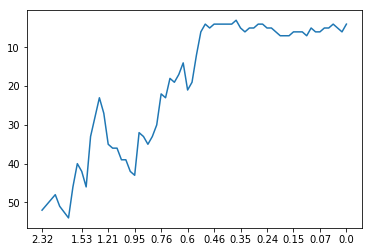

In [31]:
rankings_array=np.array(rankings)
snapshot_array=np.array(snaps_list)
z_array=np.flipud(np.array(Z_list))
plt.plot(snapshot_array,rankings_array)
plt.gca().invert_yaxis()
plt.xticks(snapshot_array[::6],z_array[::6])